# Семинар 10.02.2025 PCA

Давайте немного разберёмся в том, как работает **PCA**.

PCA - **анализ главных компонент** (*aka* Principal Component Analysis) существует ещё с 1901 года и разработал его Карл Пирсон.

**Метод заключается в следующем**: необходимо в пространстве данной размерности найти **линейное** подпространство меньшей размерности.
При этом нужно, чтобы точки, спроецированные на это подпространство (гиперплоскость), сохраняя **максимальный объем информации**.

**Как это работает?** 
Рассмотрим задачку попроще.

Пусть наши данные имеют всего **два измерения** (точки на плоскости). Задачей будет получить для каждой точки только **одно число**, которое будет ее описывать наилучшим образом, т.е. спроецировать 2D пространство на 1D.
Таким числом может быть координата проекции точки на какую-нибудь прямую. При этом **прямая выбирается так**, чтобы спроецированные на нее точки имели наибольшую **дисперсию** ведь мы сохранить максимальный объём информации о данных.

![pca.gif](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F9052057%2F8cb9faa4ace2479120fe0a326aa53253%2Fcool.gif?generation=1674492678372413&alt=media)



Посмотрите на гифку выше. Мы можем спроецировать точки разрным образом, но обратите внимание, **как меняется разброс новых (красных) точек в зависимости от выбранного способа проекции**. Кажется лучшее решение имеет наибольшую дисперсию, т.е. когда линия совпадает с розовыми отметками.

## Немного теории

Итак, на самом деле **мы просто хотим "закодировать"** имеющиеся в исходном пространстве размерностью D данные в новое пространство меньшей размерности d (не совсем так, но попозже поймём и этот нюанс).

Чуть более математическим языком мы хотим придумать **функцию-кодировщика**, переводящую наши точки пространства D $X_{D}$ в точки подпространства d $X_{d}$: 

$g(X_{D}) = X_{d}$

По аналогии мы можем сделать и **обратное преобразование**: вернуть закодированные точки $X_{d}$ в исходное пространство D:

$f(X_{d}) = \hat X_{D}$

Или, если подставить что имеем:

$f(X_{d}) = f(g(X_{D})) = \hat X_{D}$


Но надо заметить (!), поскольку супер-идеальную проекцию большого пространства в маленькое не построить, то **мы неизбежно потеряем часть информацию** (хорошо, если лишь малую её часть), т.е. при декодировании это будут уже не исходные $X_{D}$, а какие-то чутка другие точки в исходном пространстве $\hat X_{D}$, наденем на них шляпку и уже "новые" точки.

Но нам нужно не только подобрать такую функцию $g$, но и как-то оценить насколько она хороша, насколько наша информация о данных сохраняется при таком преобразовании. Нам пригодится это немного ниже, а пока маленькое математическое вступление. 


*Вообще не так нужно обозачать пространство точек X, но для простоты восприятия давайте оставим пока так*

### Линейная комбинация

Сделаем небольшое отступление и поймём математику.

![lk](./pics/pca_lk.png)

Много чего в э том мире можно **разложить на компоненты**, составляющие некую сущность. Например, красивый розовый цвет сакуры на экране - это комбинация трёх известных цветов, по сути сумма каких-то базовых объектов в определённой пропорции.

Такое разложение позволяет нам изучить "состав" наших объектов и узнать такимм образом о его свойствах или просто упростить задачу и много чего другого. Другой пример разложения - это разложение чисел на множители: $12 = 3 \cdot 4$ - так, мы узнали, что 12 делится на 2 и на 3. А вот так $12 = 2 \cdot 1 + 2 \cdot 10$, то что 12 - это две единицы и две десятки, и это будет верно в любое системе счисления.

На самом деле PCA - это тоже умелое использование линейных комбинаций. **Новые вектора** или компоненты - это некая **линейная комбинация исходных** координат.

Часто говорят, что **PCA - это просто поворот и перенос координат** так, чтобы на них была **максимальная проекция дисперсии**. 

Представьте себе **3D координаты** с осями $(x, y, z)$ и **облако точек**. Фиксируем второе, а оси переносим и вращаем так, чтобы тень от точек на $x$, $y$ и $z$ была наибольшей. 

Перенос и вращение - это сложение и умножение или **линейная комбинация** векторов. Таким образом, мы просто получаем новые координаты $(pc_{1}, pc_{2}, pc_{3})$, поиграв с исходными $(x, y, z)$. И поскольку мы оперируем линейными операциями, то **PCA - это линейный метод**, т.е. скорее поймает нам линейные зависимости в данных, а не какие-то сложные кружочки в кружочках, но можно и с таким справляться.

### Поставим задачу

Пусть у нас исходные признаки $X_{i,j}$  в пространстве размерности $D$. Хотим перейти в пространство новых признаков $Z_{i,j}$ размера $d$, при этом  $d \le D$.

$z_{i,j} = \sum_{k=1}^{D}{w_{j,k}x_{i,k}} = \sum_{k=1}^{D}{x_{i,k}w_{k,j}^T}$,

где z - новые признаки, x - старые признаки, а w - вклад каждого x в z.

Матричная запись: $Z = XW^T$

Тогда получаем, что при $d = D$ 

$\tilde{X} = ZW$,

а при снижении размерности задача выглядит как минимизация разницы между восстановленным иксом и исходным.

$||X - ZW||^2 \rightarrow min_{w}$

Это может показаться сложным (или очень простым), но не вдаваясь в подробности, как мы сказали, нам нужно найти функцию кодирования точек. А поскольку мы всё-таки оперируем векторами, то на самом деле нам нужно найти матрицу перехода. Мы можем умножить нашу матрицу на вектор-ось исходного пространства и получить вектор-ось нового пространства. Это ещё называется *подействовать* оператором на вектор. 

Есть определённые **требования**, которым должна удовлетворять такая **матрица** (например, ортогональность), для того, чтобы мы вообще могли посчитать и совершить такой переход. Дело в том, что разные методы в математике и рассчёты созданы при каких-либо допущениях. Вот вам пример из статистике, что t-тест применяется к нормально-распределённым данным, поскольку сам вывод этого стат. метода основан на предположении, что мы выводим формулы для данных такого характера. *Для чего придумали, для того и используем.* 

И оказывается, что такой супер-подходящей матрицей является **ковариационная матрица**. На ней-то и построены все вычисления метода PCA. Давайте вспомним как это посчитать и пойдём уже кодить!

### Ковариационная матрица

Ковариационная матрица между X и Y с  n  наблюдениями в пространстве D переменными вычисляется по формуле:

$$
cov(x, y) = \frac{1}{n-1} (X - \bar{X})^T (Y - \bar{Y}) = \frac{1}{n-1} \sum_{k=1}^{D}{(x_{i} - \bar{x})(y_{i} - \bar{y})}
$$

Формула упрощается, если мы изначально делаем стандартизацию, когда $\bar{x} = 0$ и $\bar{y} = 0$


•  $X$  — матрица данных размером  n × D ,

•  $\bar{X}$  — вектор средних значений по столбцам (размерности  1 × D ).

Для трёхмерного пространства будет выглядеть так:


$$
\left[
\begin{array}{cccc}
var(x)&cov(x, y)&cov(x, z) \\
cov(y, x)&var(y)&cov(y, z) \\
cov(z, x)&cov(z, y)&var(z) \\
\end{array}
\right]
$$

Напомним, что $cov(t, t) = var(t)$
где t - любая из осей в вашем пространстве.

Одно из "хороших" свойств такой матрицы, что она симметрична, т.е. $cov(t_{a}, t_{b}) = cov(t_{b}, t_{a})$. Из этого будет следовать, что её можно разложить на **собственные значения** и **собственные вектора**, чем мы сейчас и займёмся. 

### Собственные значения и собственные вектора

Итак, давайте немного повторим наш путь: 

* мы хотим найти **новые вектора** (координаты), в которых проекция наших точек будет **максимально** возможной (сохраним как можно больше информации или скорее её разброса). 
* мы узнали, что нам подходит ковариационная матрица из-за своих свойств и нам для чего-то нужно раскладывать её на какие-то вектора с какими-то значениями. Давайте разбираться.

Давайте посмотрим, что такое эти **собственные вектора** и **собственные значения** какой-либо матрицы.

Для примера будем работать с матрицей, которую просто выдумаем:

$$
A = \left[
\begin{array}{cccc}
-1&-6 \\
2&6 \\
\end{array}
\right]
$$

Давайте умножим эту матрицу на вектор $\bar{b} = \left[ \begin{array}{c} -1 \\ 1 \end{array} \right]$, который мы тоже выдумали. Или подействуем оператором $A$ на вектор $\bar{b}$ в исходном пространстве.

$$
A\bar{b} = \left[
\begin{array}{cc}
-1&-6 \\
2&6 \\
\end{array}
\right]
\left[ \begin{array}{c} -1 \\ 1 \end{array} \right] = 
\left[ \begin{array}{c} -1\cdot(-1)-6\cdot1 \\ 2\cdot(-1)+6\cdot1 \end{array} \right] = 
\left[ \begin{array}{c} -5 \\ 4 \end{array} \right]
$$

Подействовали матрицей на вектор, получили другой вектор. Всё как и должно быть.

А теперь давайте возьмём другой вектор:

$\bar{u} = \left[ \begin{array}{c} 2 \\ -1 \end{array} \right]$

$$
A\bar{u} = \left[
\begin{array}{cc}
-1&-6 \\
2&6 \\
\end{array}
\right]
\left[ \begin{array}{c} 2 \\ -1 \end{array} \right] = 
\left[ \begin{array}{c} -1\cdot2-6\cdot1 \\ 2\cdot2-6\cdot1 \end{array} \right] = 
\left[ \begin{array}{c} 4 \\ -2 \end{array} \right] = 
2 \cdot \left[ \begin{array}{c} 2 \\ -1 \end{array} \right] = 2\bar{u}
$$

Мы опять хотели как-то изменить исходный вектор умножением на матрицу $A$, но получилось так, что мы получили на самом деле тот же вектор, который просто растянули в 2 раза. Получается это особый вектор. Такие вектора и называют **собственными векторами** или проще СВ, а число 2, которое мы смогли вынести - **собственное значение** или СЗ.

У таких векторов и чисел есть много различных применений, но для нашей задачи PCA важно то, что **проекция на оси собственных векторов будут максимальными**, т.е. это те новые оси, которые мы и ищем. 

На самом деле собственные вектора и собственные значения **живут парами (значение, вектор)** (не совсем так по отношению к векторам, но пока давайте считать так). И **ключевое** здесь, что у матриц может быть разное количество таких пар, как максимум столько же сколько измерений у вашего исходного пространства, откуда вы взяли матрицу $A$. И если найти все собственные значения и вектора, ***упорядочить эти пары** по от наибольшего СЗ к наименьшему, то **проекция на оси СВ согласно такому упорядоченному набору будет уменьшаться с уменьшением величины СЗ**. Таким образом вы можете взять первые несколько компонент (векторов) и оставить только их, это сохранит по максимуму информацию о данных, но сможет уменьшить ваше пространство до размерности равное количеству оставленных компонент.

**В питоне** эта задача, нахождение СВ и СЗ, решается **одной функцией** из numpy `np.linalg.eig(cov_matrix)`. Здесь `linalg` означает линейную алгебру, откуда теория о СВ и СЗ и приходит к нам в руки, а `eig` это сокращённое название СВ и СЗ на английском *Eigenvectors* и *Eigenvalues*. 

Но если вдруг у вас не было этого в университете или оно испарилось из памяти, то мы давайте просто рассмотрим схему нахождения СВ и СЗ любой матрицы, у которой вообще их можно найти. В общем заглянем немного под капот.

Вся задача поиска СВ и СЗ сводится к решению простого уравнения, которое я люблю называть **"Правило Ай-Яй"** из-за его внешнего вида:

$$
A\bar{u} = \lambda\bar{u}
$$

здесь $\bar{u}$ - это СВ, а $\lambda$ - это СЗ. (смотрите фокус с матрицей $A$ и вектором $\bar{u}$ выше.

Или, что эквивалентно решению т.н. **характеристического уравнения**:

$$
det(A - \lambda I) = 0
$$

*Мы просто перенесли компоненты исходного уравнения в одну сторону и представили лямбду в форме вектора домножением на единичный вектор (умножтье всё что угодно на "единицу", получите это же в любом измерении)*



det - это детерминант или определитель матрицы, который для квадратной матрицы $2x2$ считается так:

$$
det(Q) = \left[
\begin{array}{cccc}
a&b \\
c&d \\
\end{array}
\right] = ad - bc
$$


Посмотрим на примере:

**0. Наша матрица:**

$$
A = \left[
\begin{array}{cccc}
4&1 \\
2&3 \\
\end{array}
\right]
$$

**1. Составляем характеристическое уравнение:**

[немного подробнее тут](http://mathprofi.ru/sobstvennye_znachenija_i_sobstvennye_vektory.html)

$$
\text{det}(A - \lambda I) = \left[
\begin{array}{cccc}
4&1 \\
2&3 \\
\end{array}
\right] 
-
\lambda 
\left[
\begin{array}{cccc}
1&0 \\
0&1 \\
\end{array}
\right] 
= 
\left[
\begin{array}{cccc}
4-\lambda&1 \\
2&3-\lambda \\
\end{array}
\right] =
$$

$$
=
(4 - \lambda)(3 - \lambda) - 2 = 0
$$

**2. Решаем характеристическое уравнение, получая СЗ:**

$(4 - \lambda)(3 - \lambda) - 2 = 12 - 7\lambda + \lambda² - 2 = \lambda² - 7\lambda + 10 = 0
$

$$
\lambda_1 = 5, \lambda_2 = 2
$$

**3. Подставляя СЗ в исходное уравнение, получаем и СВ:**

Для $λ_1$:

$$
(A - 5I)\bar{u} = 0
$$

Для $λ_2$:

$$
(A - 2I)\bar{u}= 0
$$

А именно для $λ_1$:

$$
(A - 5I)\bar{u} = 0
$$

Отметим, что наш пока неизвестный СВ $\bar{u}$ это какой-то $x$ и $y$, т.е. $\bar{u} = \left[ \begin{array}{c} x \\ y \end{array} \right]$. Подставим:

$$
(A - 5I)\bar{u} 
= 
$$

$$
=
\left[
\begin{array}{cccc}
4&1 \\
2&3 \\
\end{array}
\right] 
-
5 
\left[
\begin{array}{cccc}
1&0 \\
0&1 \\
\end{array}
\right]
\left[ \begin{array}{c} x \\ y \end{array} \right]
=
$$

$$
=
\left[
\begin{array}{cccc}
4-5&1 \\
2&3-5 \\
\end{array}
\right]
\left[ \begin{array}{c} x \\ y \end{array} \right]
=
$$

$$
=
\left[
\begin{array}{cccc}
-1&1 \\
2&-2 \\
\end{array}
\right]
\left[ \begin{array}{c} x \\ y \end{array} \right]
$$

И, если мы вспомним, что матрица - это на самом деле просто обозначение системы уравнений, то получим 2 уравнения тут, перемножим матрицу на пока неизвестный СВ:

$$
-x + y = 0 \\
2x - 2y = 0
$$

Вообще-то всегда есть тривиальное решение в виде $x = 0$ и $y = 0$, но оно нас не интересует. А из уравнений, можно получить, что $x = y$ и всё тут. Но на самом деле, мы выше сделали помарочку, что собственных векторов для одного собственного значения вообще-то говоря больше одного. Здесь мы можем взять любое по типу $\bar{u}_{1} = \left[ \begin{array}{c} 14 \\ 14 \end{array} \right]$ или $\bar{u}_{1} = \left[ \begin{array}{c} 8 \\ 8 \end{array} \right]$. В обоих случаях $x = y$. И это всё из-за того, что мы опять можем вынести множитель. Поэтому математики решили брать самый простой случай и здесь это будет просто $\bar{u}_{1} = \left[ \begin{array}{c} 1 \\ 1 \end{array} \right]$

По аналогии для для $λ_2$ мы придём к уравнениям:

$$
2x + y = 0 \\
2x + y = 0
$$

и поймём, что $x = -0.5y$ и возьмём $\bar{u}_{2} = \left[ \begin{array}{c} -1 \\ 2 \end{array} \right]$


Итак, мы нашли СВ и СЗ ковариационной матрицы. Для PCA, когда мы работаем не в простом 2d измерении, у нас много СВ и СЗ. И мы можем из всех них оставлять только 2 компоненты, т.е. два СВ с наибольшими СЗ. В этом и есть суть PCA. А теперь давайте реализуем PCA, используя только `numpy`.

## Пишем код

Давайте пробежимся кодом по тому, что обсудили

In [1]:
#Импортируем трушные библиотеки
import pandas as pd
import numpy as np

In [2]:
#и немного не трушных
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.datasets

Отрабатывать алгоритм будем на этом датасете: [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset). 

Его можно скачать из интернета или просто импортировать из **широкоиспользуемой для машинного обучения библиотеки** `sklearn` модуля `datasets`. Мы на неё ближе посмотрим немного позже.

In [3]:
#Импорт делается так
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print(f'У нас есть {X.shape[0]} образцов по {X.shape[1]} фичей')

У нас есть 569 образцов по 30 фичей


### Стандартизуем данные

![ss](./pics/pca_standart.PNG)

In [4]:
#Шаг 1. Стандартизация данных - делаем влоб
mean_ = X.mean(axis =0)
std_ = X.std(axis=0)

X_scaled = (X - mean_) / std_

In [5]:
# Было
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
#Стало
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Предлагаю сравнить с чем-то встроенным. Давайте опять вернёмся к той супер-библиотеке для классического ML `sklearn`. Вы, возможно, уже и так знаете, но в нём есть модуль `preprocessing` для того, чтобы что-то сделать с нашей датой, подготовить её к анализу или обучению модели, в общем препроцессировать. И там хранится стандартный скейлер `StandardScaler`, который делает то же самое, что мы сделали сами выше.

Он умеет `fit` и `transform` или прям сразу `fit_transform`. Сделаем тут паузу - посмотрите, что мы сделали с данными ывше сами: мы сначала посчитали среднее и дисперсию, а только потом применили само z-преобразование. Так вот это и есть `fit` (посчитать параметры, зафитить скейлер на данные) и `transform` (непосредственно применить стандартизацию). 

Схема работы с подобными (с моделями также) объектами следующая: 
1. Импортируем
2. Кладём в какую-нибудь переменную, задавая параметры, если нужно
3. Используем

А теперь смотрите код ниже:

In [7]:
# Сравниваем  реальную дату
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Значенияя похожи.

### Ищем ковариационную матрицу

![ss](./pics/pca_cov.png)

![ss](./pics/pca_covmatr.jpg)

In [8]:
# Шаг 2. Ковариационная матрица 

features = X_scaled.T
cov_matrix = np.cov(features)

print(f'Посмотрим на размеры X_scaled: {X_scaled.shape}')
print(f'Посмотрим на размеры features: {features.shape}')
print(f'Посмотрим на размеры cov_matrix: {cov_matrix.shape}')

cov_matrix

Посмотрим на размеры X_scaled: (569, 30)
Посмотрим на размеры features: (30, 569)
Посмотрим на размеры cov_matrix: (30, 30)


array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

### Ищем СВ и СЗ

In [9]:
# Шаг 3. Собственные вектора и собственные значения
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

eig_values[:10]

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

Давайте посмотрим на значения наших собственных значений:

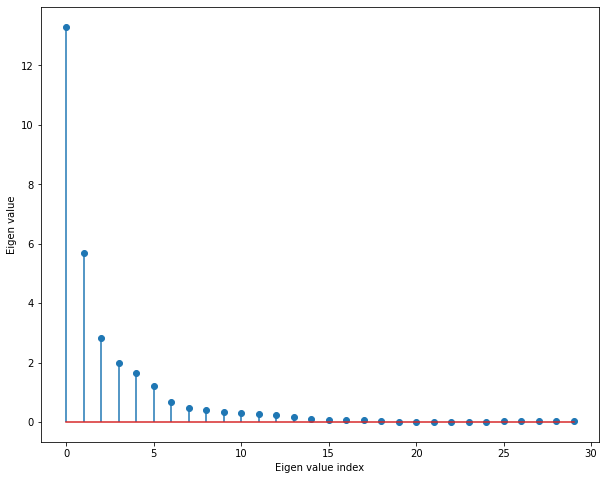

In [10]:
plt.figure(figsize=(10,8))
plt.stem(eig_values[:200], use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

Заметьте, что **значений столько же сколько фичей**, т.е. столько же, скольки-мерным было исходное пространство. Мы не уменьшили наше пространство...пока что.

Но чем меньше собственное значение, тем меньше информации (дисперсии) оно хранит, поэтому мы **можем отбросить** сколько посчитаем компонент "с конца", с наименьшим собственным значением. 

Давайте сейчас оставим лишь первые 2 компоненты, чтобы просто поглядеть на наши данные наконец-то.

In [11]:
# Шаг 4. Отбрасываем ненужные компоненты
projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])

res2d = pd.DataFrame(projected_1, columns=['PC1'])
res2d['PC2'] = projected_2
res2d['Y'] = y

res2d.head()

,PC1,PC2,Y
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


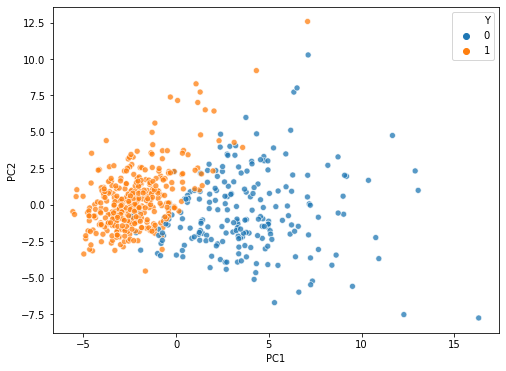

In [12]:
# И посмотрим
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Y", data=res2d, alpha=0.75);

Супер! Мы смогли **30 фичей визуализировать на 2d плоте**. Причём мы увидели, что **в данных присутствует некая структура** - точки разного цвета кучкуются. Значит, возможно, мы сможем найти модельку машинного обучения, которая будет предсказывать нам класс образцов по этим фичам.

## Пакетная реализация

А теперь давайте **сравним с оригиналом**. 

Всё в той же библиотеке `sklearn` есть модуль `decomposition`, т.е. разложение, хранится метод `PCA`, который опять-таки умеет делать `fit` (посчитать как надо перейти от старых точек к новым) и `transform` (перейти к этим точкам). Берём и используем!

In [13]:
# Обновим датасет
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [14]:
# Проводим PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)#мы можем сразу задать, что хотим только 2 компоненты сохранить
X_pca = pca.fit_transform(X)

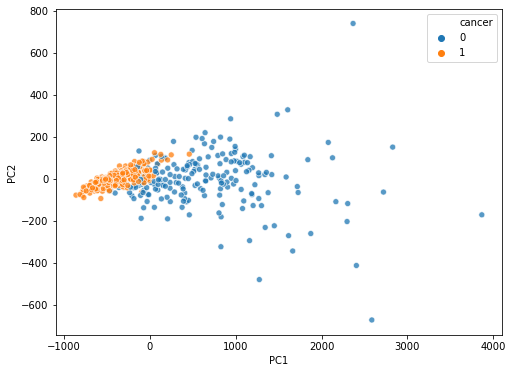

In [15]:
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75);

А теперь сравним и скажем, почему получилось не то :(

Да, забыли отшкалировать данные. Как мы обсуждали на лекции и в начале семинара, PCA чувствителен к шкалированию данных. Давайте попробуем ещё разок, используя уже известный нам 

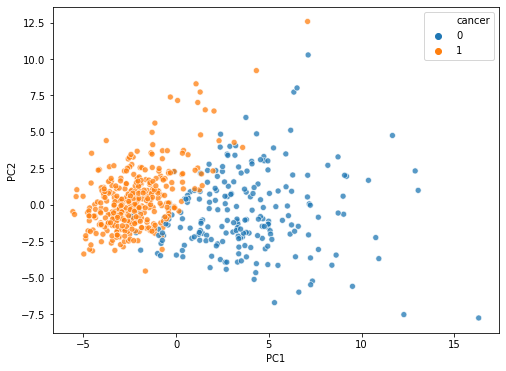

In [16]:
# Датасет
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Шкалирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df = pd.DataFrame({"PC1": X_pca[:,0],
                   "PC2": X_pca[:,1],
                   "cancer": y})

# Рисуем
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cancer", data=df, alpha=0.75);

Ура! Результат похож на нашу реализацию 

*всегда бы так*

### Что-то ещё

[супер-возможность играть с PCA тут](https://setosa.io/ev/principal-component-analysis/)

[супер-применение PCA в задаче распознаввания лиц aka Eigenface](https://machinelearningmastery.com/face-recognition-using-principal-component-analysis/)

[супер-гифка из начала семинара от сюда](https://www.kaggle.com/discussions/general/380602)